# **IMPORT REQUIRED LIBRARIES**

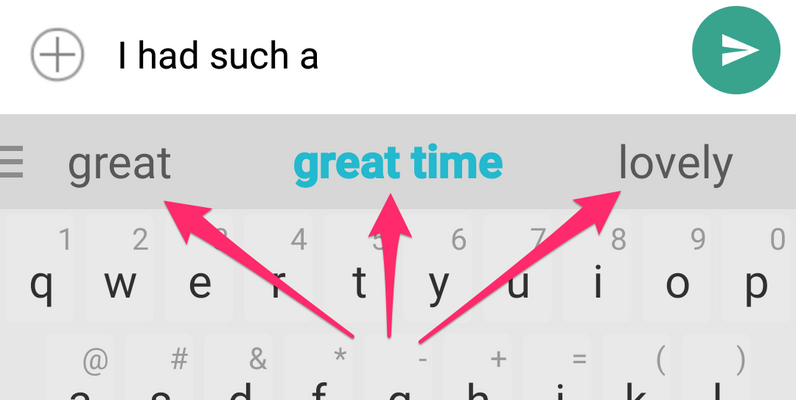

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

# **LOAD AND PREPROCESS THE DATA**

In [2]:
file =open("1661-0.txt","r",encoding = "utf8")
# store file in list
lines = []
for i in file:
  lines.append(i)
# convert list to string
data = ""
for i in lines:
  data = ' '.join(lines)
# replace unnecessary stuff with place
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('"', '')
#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [3]:
len(data)

578728

# **TOKENIZATION**

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('token.pkl', 'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[145, 4789, 1, 1020, 4, 128, 34, 45, 611, 2235, 2236, 30, 1021, 15, 23]

In [5]:
len(sequence_data)

111252

In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [7]:
sequences = []
for i in range(3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)
print("The length of sequences are: ", len(sequences))
sequences  = np.array(sequences)
sequences[:10]

The length of sequences are:  111249


array([[ 145, 4789,    1, 1020],
       [4789,    1, 1020,    4],
       [   1, 1020,    4,  128],
       [1020,    4,  128,   34],
       [   4,  128,   34,   45],
       [ 128,   34,   45,  611],
       [  34,   45,  611, 2235],
       [  45,  611, 2235, 2236],
       [ 611, 2235, 2236,   30],
       [2235, 2236,   30, 1021]])

In [8]:
x = []
y = []
for i in sequences:
  x.append(i[0:3])
  y.append(i[3])
x = np.array(x)
y = np.array(y)

In [9]:
print("Data:", x[:10])
print("Response: ", y[:10])

Data: [[ 145 4789    1]
 [4789    1 1020]
 [   1 1020    4]
 [1020    4  128]
 [   4  128   34]
 [ 128   34   45]
 [  34   45  611]
 [  45  611 2235]
 [ 611 2235 2236]
 [2235 2236   30]]
Response:  [1020    4  128   34   45  611 2235 2236   30 1021]


In [10]:
y = to_categorical(y , num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **CREATE THE MODEL**

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length = 3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(vocab_size, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             89310     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8931)              8939931   
                                                                 
Total params: 22078241 (84.22 MB)
Trainable params: 22078241 (84.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **BUILD THE MODEL**

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.fit(x, y, epochs=30, batch_size=64, callbacks=[checkpoint])

Epoch 1/30
1739/1739 [==============================] - ETA: 0s - loss: 6.4192
Epoch 1: loss improved from inf to 6.41924, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1739/1739 [==============================] - 47s 23ms/step - loss: 6.4192
Epoch 2/30
1737/1739 [============================>.] - ETA: 0s - loss: 5.7828
Epoch 2: loss improved from 6.41924 to 5.78300, saving model to next_words.h5
1739/1739 [==============================] - 32s 18ms/step - loss: 5.7830
Epoch 3/30
1739/1739 [==============================] - ETA: 0s - loss: 5.4203
Epoch 3: loss improved from 5.78300 to 5.42030, saving model to next_words.h5
1739/1739 [==============================] - 31s 18ms/step - loss: 5.4203
Epoch 4/30
1738/1739 [============================>.] - ETA: 0s - loss: 5.1474
Epoch 4: loss improved from 5.42030 to 5.14766, saving model to next_words.h5
1739/1739 [==============================] - 31s 18ms/step - loss: 5.1477
Epoch 5/30
1739/1739 [==============================] - ETA: 0s - loss: 4.9214
Epoch 5: loss improved from 5.14766 to 4.92142, saving model to next_words.h5
1739/1739 [==============================] - 36s 21ms/step - loss: 4.9214
Ep

# **PREDICT THE MODEL**

In [14]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
#Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break
  return predicted_word

In [15]:
while(True):
    text = input("Enter your line: ")

    if text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)

            Predict_Next_Words(model, tokenizer, text)

        except Exception as e:
            print("Error occurred: ", e)
            continue


Enter your line: were abhorrent to his
['abhorrent', 'to', 'his']
1/1 [==============================] - 1s 699ms/step
cold
Enter your line: throw a doubt upon all his
['upon', 'all', 'his']
1/1 [==============================] - 0s 21ms/step
mental
Enter your line: 0
Execution completed.....


In [19]:
!pip install gradio

In [20]:
import gradio as gr

ImportError: ignored

In [ ]:
def Predict_Next_Words(model, tokenizer, text):
    # Initialize an empty string to concatenate all lines
    data = ' '.join(lines)

    # Clean the data by removing unwanted characters
    data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('"', '')

    # Split the cleaned data into words
    data = data.split()

    # Join the words back into a single string
    data = ' '.join(data)

    # It seems like you are trying to display the first 500 characters of 'data',
    # but this line has no effect without a print statement.
    # To print the first 500 characters, you should use: print(data[:500])
    print(data[:500])
    # The tokenizer should be fitted on the entire dataset, not just the current data
    tokenizer.fit_on_texts([data])

    # Convert the text to sequences
    sequence = tokenizer.texts_to_sequences([data])[0]

    # Convert the sequence to a NumPy array
    sequence = np.array(sequence)

    # Predict the next word
    preds = model.predict(sequence)
    predicted_word_index = np.argmax(preds)

    # Find the predicted word from the tokenizer's word index
    predicted_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            predicted_word = word
            break

    print(predicted_word)  # Print the predicted word
    return predicted_word

def transform(text):
    text = text.split(" ")
    text = text[-3:]
    return Predict_Next_Words(model, tokenizer, text)  # Return the predicted word



In [ ]:
demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='text',
)


In [ ]:
demo.launch(share=True)

In [ ]:
def Predict_Next_Words(model, tokenizer, text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

def transform(text):
    if text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)

            Predict_Next_Words(model, tokenizer, text)

        except Exception as e:
            print("Error occurred: ", e)
            continue


